In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn lightgbm scipy tqdm notebook

  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached lightgbm-4.6.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached notebook-7.4.7-py3-none-any.whl.metadata (10 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_6

In [2]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cusparse_cu12-12.5.8.93-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.8 kB)
  Using cache

In [3]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]3 [ipywidgets]


In [1]:
import pandas as pd
import numpy as np
import os
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb
from scipy.sparse import hstack, csr_matrix

import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

SEED = 42
np.random.seed(SEED)

BASE_DIR = '../dataset/'
TRAIN_CSV_PATH = os.path.join(BASE_DIR, 'train.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'test.csv')
TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'images/train/')
TEST_IMAGE_DIR = os.path.join(BASE_DIR, 'images/test/')

In [2]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_test = pd.read_csv(TEST_CSV_PATH)

print("Training Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)
display(df_train.head())

Training Data Shape: (75000, 4)
Test Data Shape: (75000, 3)


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


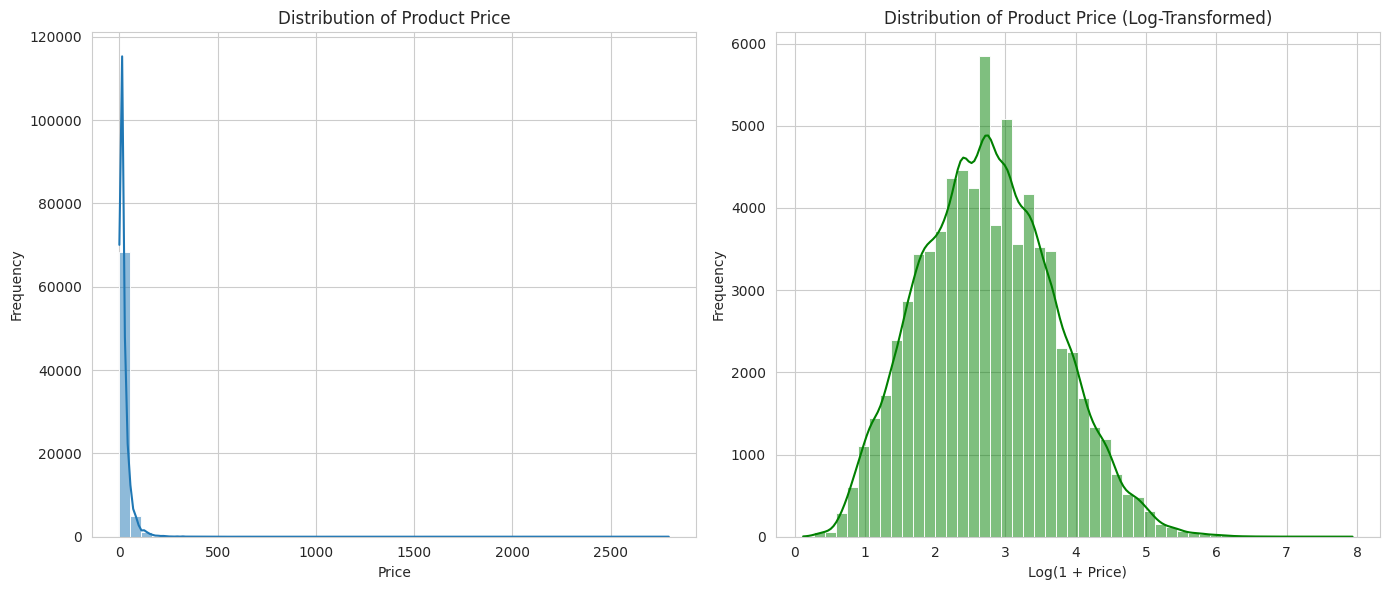

In [3]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['price'], bins=50, kde=True)
plt.title('Distribution of Product Price')
plt.xlabel('Price')
plt.ylabel('Frequency')


df_train['log_price'] = np.log1p(df_train['price'])
plt.subplot(1, 2, 2)
sns.histplot(df_train['log_price'], bins=50, kde=True, color='green')
plt.title('Distribution of Product Price (Log-Transformed)')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
def parse_catalog_content(df):
    df_copy = df.copy()
    
    # Extract Item Name
    df_copy['item_name'] = df_copy['catalog_content'].str.extract(r'Item Name: (.*?)\n')
    
    # Extract Value
    df_copy['value'] = df_copy['catalog_content'].str.extract(r'Value: (.*?)\n')
    df_copy['value'] = pd.to_numeric(df_copy['value'], errors='coerce').fillna(0)

    # Extract Unit
    df_copy['unit'] = df_copy['catalog_content'].str.extract(r'Unit: (.*?)\n')
    df_copy['unit'] = df_copy['unit'].str.strip().fillna('Unknown').astype('category')
    
    # Use the full catalog_content as the main text feature, filling NaNs
    df_copy['text_features'] = df_copy['catalog_content'].fillna('').str.lower()
    
    return df_copy

df_train_featured = parse_catalog_content(df_train)
df_test_featured = parse_catalog_content(df_test)

print("Processed training data head:")
display(df_train_featured.head())

Processed training data head:


,sample_id,catalog_content,image_link,price,log_price,item_name,value,unit,text_features
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,1.773256,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",72.00,Fl Oz,"item name: la victoria green taco sauce mild, ..."
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,2.647592,"Salerno Cookies, The Original Butter Cookies, ...",32.00,Ounce,"item name: salerno cookies, the original butte..."
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,1.088562,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",11.40,Ounce,"item name: bear creek hearty soup bowl, creamy..."
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,3.444895,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,11.25,Ounce,item name: judee’s blue cheese powder 11.25 oz...
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,4.211979,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",12.00,Count,"item name: kedem sherry cooking wine, 12.7 oun..."


In [5]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words='english',
    token_pattern=r'\b[a-zA-Z]{2,}\b'
)

print("Fitting TF-IDF on training data...")
X_train_text = tfidf_vectorizer.fit_transform(df_train_featured['text_features'])

print("Transforming test data...")
X_test_text = tfidf_vectorizer.transform(df_test_featured['text_features'])

print("\nShape of TF-IDF matrices:")
print("Train:", X_train_text.shape)
print("Test:", X_test_text.shape)

Fitting TF-IDF on training data...
Transforming test data...

Shape of TF-IDF matrices:
Train: (75000, 10000)
Test: (75000, 10000)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
model.fc = nn.Identity()
model = model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Using device: cuda


In [7]:
def get_image_embedding(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img_t = preprocess(img)
        batch_t = torch.unsqueeze(img_t, 0).to(device)
        
        with torch.no_grad():
            embedding = model(batch_t)
        
        return embedding.squeeze().cpu().numpy()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros(2048)
    
TRAIN_EMBEDDINGS_PATH = 'train_image_embeddings.npy'
TEST_EMBEDDINGS_PATH = 'test_image_embeddings.npy'

def compute_or_load_embeddings(df, image_dir, save_path):
    if os.path.exists(save_path):
        print(f"Loading pre-computed embeddings from {save_path}...")
        return np.load(save_path)
    else:
        print(f"Computing embeddings for {save_path}...")
        embeddings = [get_image_embedding(os.path.join(image_dir, f"{sid}.jpg")) for sid in tqdm(df["sample_id"])]
        np_embeddings = np.array(embeddings)
        np.save(save_path, np_embeddings)
        return np_embeddings

In [8]:

X_train_image = compute_or_load_embeddings(df_train, TRAIN_IMAGE_DIR, TRAIN_EMBEDDINGS_PATH)
print("Shape of training image embeddings:", X_train_image.shape)

Loading pre-computed embeddings from train_image_embeddings.npy...
Shape of training image embeddings: (75000, 2048)


In [9]:
X_test_image = compute_or_load_embeddings(df_test, TEST_IMAGE_DIR, TEST_EMBEDDINGS_PATH)
print("Shape of test image embeddings:", X_test_image.shape)

Loading pre-computed embeddings from test_image_embeddings.npy...
Shape of test image embeddings: (75000, 2048)


In [10]:
X_train_unit = pd.get_dummies(df_train_featured['unit'], prefix='unit', dtype=int)
X_test_unit = pd.get_dummies(df_test_featured['unit'], prefix='unit', dtype=int)

train_cols = X_train_unit.columns
X_test_unit = X_test_unit.reindex(columns=train_cols, fill_value=0)

X_train_full = hstack([
    csr_matrix(df_train_featured[['value']].values),
    csr_matrix(X_train_unit.values),
    X_train_text,
    csr_matrix(X_train_image)
]).tocsr()

X_test_full = hstack([
    csr_matrix(df_test_featured[['value']].values),
    csr_matrix(X_test_unit.values),
    X_test_text,
    csr_matrix(X_test_image)
]).tocsr()

y_train_log = np.log1p(df_train_featured['price'].values)

print("Final Training Feature Matrix Shape:", X_train_full.shape)
print("Final Test Feature Matrix Shape:", X_test_full.shape)

Final Training Feature Matrix Shape: (75000, 12147)
Final Test Feature Matrix Shape: (75000, 12147)


In [ ]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def lgb_smape(y_true, y_pred):
    y_true_exp = np.expm1(y_true)
    y_pred_exp = np.expm1(y_pred)
    return 'smape', smape(y_true_exp, y_pred_exp), False

params = {
    'objective': 'regression_l1',
    'met    ric': 'mae',
    'n_estimators': 2500,
    'learning_rate': 0.03,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'num_leaves': 40,
    'verbose': -1,
    'n_jobs': -1,
    'seed': SEED,
    'boosting_type': 'gbdt',
    'device': 'gpu'
}

model = lgb.LGBMRegressor(**params)

print("Starting LightGBM model training...")
model.fit(
    X_train_full, 
    y_train_log,
    callbacks=[lgb.log_evaluation(1)]
)

Starting LightGBM model training...


,boosting_type,'gbdt'
,num_leaves,40
,max_depth,-1
,learning_rate,0.03
,n_estimators,2500
,subsample_for_bin,200000
,objective,'regression_l1'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [13]:
print("Generating predictions on test set...")

log_predictions = model.predict(X_test_full)

final_predictions = np.expm1(log_predictions)
final_predictions[final_predictions < 0] = 0 

submission = pd.DataFrame({
    'sample_id':df_test['sample_id'],
    'price': final_predictions.astype(float)
})

submission_path = 'test_out.csv'
submission.to_csv(submission_path, index=False)

print("Submission file created!")

Generating predictions on test set...
Submission file created!
